#Trabalho de Avaliação e Desempenho

Grupo:<br>
Bruno Hryniewicz - 115150099 <br>
Eduardo da Silva Barbosa - 116150432 <br>
Miguel Bicudo - 116033119 <br>
Nickolas Gomes Pinto - 114148170 <br>
Rafael Pais Cardoso - 116140788 <br>
Tainá da Silva Lima - 116165607 <br>

Professor(a): Daniel Sadoc <br>
Período: 2019.2

##Questão 3

### Código-base

In [0]:
import numpy as np
import scipy as sp
import scipy.stats
import math
import time
import random
import operator
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from decimal import *

class Eventos:
  def __init__(self, tipo, fimEvento, duracaoServico):
    self.tipo = tipo
    self.fimEvento = fimEvento #Do ponto de vista do lambda é a chegada na fila e do ponto de vista de mi é o tempo de sair do servidor.
    self.duracaoServico = duracaoServico

#Simulador  
def simulaMG1 (λ1, λ2, µ1, µ2, nEventos, X = random.expovariate, tempoTotalSimulacao = 4000): # Simula uma fila M/G/1, retornando o E(N)
  linhaDoTempo = 0
  #tempoUltimoEvento = 0
  
  area = 0
  N0 = 0
  T0 = 0
  numeroClienteT1 = 0
  numeroClienteT2 = 0
  numeroTotalCliente = 0
  tempTotalServico = 0
  fila = []  #Fila. OBS: A primeira posição representa o servidor, logo o cliente que ocupar tal posição esta no servidor.
  eventos = [] #Fila de eventos
  atualEvento = 0

  #Primeira ocorrência de eventos (λ1 e λ2)
  temp = random.expovariate(λ1)
  eventos.append(Eventos("Chegada1",temp , temp))
  if(λ2 != 0):
    temp = random.expovariate(λ2)
    eventos.append(Eventos("Chegada2", temp, temp))
  

  while(linhaDoTempo <= tempoTotalSimulacao):

    #eventos = sorted(eventos,key=attrgetter('fimEvento'))
    eventos.sort(key=lambda eventos: eventos.fimEvento)

    #print(eventos)
    atualEvento = eventos[0] #Pega o primeiro evento
    eventos = eventos[1:] #Tira o primeiro evento da fila de eventos
    linhaDoTempo = atualEvento.fimEvento #Avança a linha do tempo

    if(atualEvento.tipo == "Chegada1"):
      numeroClienteT1 += 1
      fila.append(1)
      temp = random.expovariate(λ1)
      eventos.append(Eventos("Chegada1", linhaDoTempo + temp, temp))
      #if(λ2 != 0):
      #  temp = random.expovariate(λ2)
      #  eventos.append(Eventos("Chegada2", linhaDoTempo + temp, temp))

      if(len(fila) == 1):
        temp =  X(µ1)
        eventos.append(Eventos("Servico1", linhaDoTempo + temp, temp))
        numeroClienteT1 -= 1

    elif(atualEvento.tipo == "Chegada2"):
      numeroClienteT2 += 1
      fila.append(2)
      temp = random.expovariate(λ2)
      eventos.append(Eventos("Chegada2", linhaDoTempo +temp, temp))
      #temp = random.expovariate(λ1)
      #eventos.append(Eventos("Chegada1", linhaDoTempo + temp, temp))

      if(len(fila) == 1):
        temp =  X(µ2)
        eventos.append(Eventos("Servico2", linhaDoTempo + temp, temp))
        numeroClienteT2 -= 1

    elif(atualEvento.tipo == "Servico1" or atualEvento.tipo == "Servico2"):
      fila = fila[1:]
      numeroTotalCliente += 1
      tempTotalServico += atualEvento.duracaoServico

      if(len(fila) != 0 and fila[0] == 1):
        temp =  X(µ1)
        eventos.append(Eventos("Servico1", linhaDoTempo + temp, temp))
      elif(µ2 != 0 and len(fila) != 0 and fila[0] == 2 ):
        temp =  X(µ2)
        eventos.append(Eventos("Servico2", linhaDoTempo + temp, temp))
 
    if(len(fila) != N0):

      if(N0 > 0 ):
        area = area + (N0-1)*(linhaDoTempo - T0)

      N0 = len(fila)
      T0 = linhaDoTempo
  
  return area/linhaDoTempo, numeroTotalCliente, (tempTotalServico/numeroTotalCliente), (tempTotalServico/linhaDoTempo)  #Retorna [Nq], N, [X], ρ 

#Chama o simulador diversas vezes e gera a média dos resultados
def simulaGeral(λ1, λ2, µ1, µ2, nSimulacoes, X = random.expovariate):
  # Array para o resultado de cada uma das simulações
  Nq_barras = []
  W_barras = []
  X_barras = []
  T_barras = []
  N_s = []
  ρ_s = []

  # Médias das simulações
  media_simus_Nq = 0
  media_simus_W = 0
  media_simus_X = 0
  media_simus_N = 0
  media_simus_ρ = 0
  media_simus_T = 0
  
  desvio_simus_Nq = 0
  desvio_simus_W = 0
  desvio_simus_X = 0
  desvio_simus_N = 0
  desvio_simus_ρ = 0
  desvio_simus_T = 0

  for i in range(nSimulacoes): #Realiza n Simulacões.
    NQ_barra, N, X_barra, ρ = simulaMG1(λ1, λ2, µ1, µ2, 1000, X) #Simulações com 1000 eventos cada
    
    Nq_barras.append(NQ_barra) 
    N_s.append(N)
    X_barras.append(X_barra)
    W_barras.append(Nq_barras[i]/(λ1+λ2))
    ρ_s.append(ρ)
    T_barras.append(W_barras[i] + X_barras[i])

  #Média Para Nq_barra de todas as simulações
  media_simus_Nq = np.array(Nq_barras).mean()
  desvio_simus_Nq = np.std(np.array(Nq_barras))
  #intervaloConf_Nq = sp.stats.norm.interval(0.95, loc=media_simus_Nq, scale=desvio_simus_Nq)
  intervaloConf_Nq = []
  intervaloConf_Nq.append(media_simus_Nq - 1.96*(desvio_simus_Nq/math.sqrt(len(Nq_barras))))
  intervaloConf_Nq.append(media_simus_Nq + 1.96*(desvio_simus_Nq/math.sqrt(len(Nq_barras))))
  
  #Média Para W_barra de todas as simulações
  media_simus_W = np.array(W_barras).mean()
  desvio_simus_W = np.std(np.array(W_barras))
  #intervaloConf_W = sp.stats.norm.interval(0.95, loc=media_simus_W, scale=desvio_simus_W)
  intervaloConf_W = []
  intervaloConf_W.append(media_simus_W - 1.96*(desvio_simus_W/math.sqrt(len(W_barras))))
  intervaloConf_W.append(media_simus_W + 1.96*(desvio_simus_W/math.sqrt(len(W_barras))))

  #Média para N (Número de clientes) de todas as simulações
  media_simus_N = np.array(N_s).mean()
  desvio_simus_N = np.std(np.array(N_s))
  #intervaloConf_N = sp.stats.norm.interval(0.95, loc=media_simus_N, scale=desvio_simus_N)
  intervaloConf_N = []
  intervaloConf_N.append(media_simus_N - 1.96*(desvio_simus_N/math.sqrt(len(N_s))))
  intervaloConf_N.append(media_simus_N + 1.96*(desvio_simus_N/math.sqrt(len(N_s))))

  #Média para X_barra (Tempo de serviço médio) de todas as simulações
  media_simus_X = np.array(X_barras).mean()
  desvio_simus_X = np.std(np.array(X_barras))
  #intervaloConf_X = sp.stats.norm.interval(0.95, loc=media_simus_X, scale=desvio_simus_X)
  intervaloConf_X = []
  intervaloConf_X.append(media_simus_X - 1.96*(desvio_simus_X/math.sqrt(len(X_barras))))
  intervaloConf_X.append(media_simus_X + 1.96*(desvio_simus_X/math.sqrt(len(X_barras))))

  #Média para ρ (Utilização) de todas as simulações 
  media_simus_ρ = np.array(ρ_s).mean()
  desvio_simus_ρ = np.std(np.array(ρ_s))
  #intervaloConf_ρ = sp.stats.norm.interval(0.95, loc=media_simus_ρ, scale=desvio_simus_ρ)
  intervaloConf_ρ = []
  intervaloConf_ρ.append(media_simus_ρ - 1.96*(desvio_simus_ρ/math.sqrt(len(ρ_s))))
  intervaloConf_ρ.append(media_simus_ρ + 1.96*(desvio_simus_ρ/math.sqrt(len(ρ_s))))

  #Média para T_barra(Tempo médio no sistema) de todas as simulações
  media_simus_T = np.array(T_barras).mean()
  desvio_simus_T = np.std(np.array(T_barras))
  #intervaloConf_T = sp.stats.norm.interval(0.95, loc=media_simus_T, scale=desvio_simus_T)
  intervaloConf_T = []
  intervaloConf_T.append(media_simus_T - 1.96*(desvio_simus_T/math.sqrt(len(T_barras))))
  intervaloConf_T.append(media_simus_T + 1.96*(desvio_simus_T/math.sqrt(len(T_barras))))

  return [intervaloConf_Nq, media_simus_Nq, intervaloConf_W, media_simus_W, media_simus_N, media_simus_X, media_simus_ρ, media_simus_T, intervaloConf_N, intervaloConf_X, intervaloConf_ρ, intervaloConf_T]



In [0]:
def X2_barra(µ = 0, a = 0, b = 0, tipoServico = 'e'):
  if tipoServico == 'e':
    return 2/(pow(µ,2))
  elif tipoServico == 'u':
    return ( pow(a, 2) + a*b + pow(b,2)  )/3
  else:
    return 1/(pow(µ,2))

def X_barra(µ = 0, a = 0, b = 0, tipoServico = 'e'):
  if tipoServico == 'e':
    return 1/µ
  elif tipoServico == 'u':
    return (a+b)/2
  else:
    return 1/µ

def analiticoUniforme(λ1, λ2, a1, b1, a2, b2):
  Xr1 = X2_barra(0, a1, b1, 'u')/(2*(X_barra(0,a1,b1,'u')))
  Xr2 = X2_barra(0, a2, b2, 'u')/(2*(X_barra(0,a2,b2,'u')))
  
  ρ1 = λ1*X_barra(0,a1,b1,'u')
  ρ2 = λ2*X_barra(0,a2,b2,'u')

  W1 = ρ1*Xr1/(1-ρ1)
  W2 = ρ2*Xr2/(1-ρ2)
  
  W = W1*(λ1/(λ1+λ2)) + W2*(λ2/(λ1+λ2))

  Nq = (λ1+λ2)*W

  return [Nq, W]

def analiticoMD1(λ1, λ2, µ1, µ2):
  ρ = λ1/µ1 + λ2/µ2
  µ = (λ1/(λ1+λ2))*µ1 + (λ2/(λ1+λ2))*µ2
  
  if(ρ == 1):
    ρ = 0.999

  W = ρ/(2*µ*(1-ρ))

  Nq = (λ1+λ2)*W
  
  return [Nq,W]

def analiticoMM1(λ1, λ2, µ1, µ2):
  '''
  ρ1 = λ1/µ1

  if(µ2 != 0):
    ρ2 = λ2/µ2
  
  W1 = ρ1/(µ1*(1-ρ1))

  if(µ2 != 0):
    W2 = ρ2/(µ2*(1-ρ2))
  
  Nq1 = λ1*W1

  if(µ2 != 0):
    Nq2 = λ2*W2
    Nq = (λ1/(λ1+λ2))*Nq1 + (λ2/(λ1+λ2))*Nq2
  else:
    Nq = Nq1'''

  '''
  ρ = (λ1+λ2)/(µ1+µ2)
  W = ρ/((µ1+µ2)*(1-ρ))
  
  Nq = (λ1+λ2)*W
  '''
  if(µ2 != 0):
    ρ = λ1/µ1 + λ2/µ2
    #print(ρ," - ", λ1, λ2, µ1, µ2) 
  else:
    ρ = λ1/µ1

  if(ρ == 1):
    ρ = 0.999

  Nq = (ρ*ρ)/(1-ρ)

  W = Nq/(λ1+λ2)

  return [Nq, W]

In [0]:
#Imprimir os gráficos

def printGraficoQ3(cenario, result, maxXsticks):
  ultimoNqCadeia = -1
  ultimoNqSimu = result[1][len(result[1])-1]

  ultimoWCadeia = -1
  ultimoWSimu = result[3][len(result[3])-1]

  plt.figure(figsize= [20, 20])
  plt.subplot(211)
  plt.title ("λ x número de clientes no cenário " + str(cenario) )
  plt.bar(result[0], result[1], width = 0.01, color = 'blue', yerr = result[2], capsize=7,  edgecolor = 'black', align='edge', label='Simulação')
  
  #if(cenario == 2 or cenario == 3):
  #  resultAnalitico = result[4][:len(result[4])-1]
  #  resultAnalitico.append(result[1][len(result[1])-1])
  #else:
  #  resultAnalitico = result[4]
  plt.bar([ x+0.01 for x in result[0] ], result[4], width = 0.01, color = 'cyan', edgecolor = 'black', align='edge', label='Analítico')
  
  if(cenario != 3):
    plt.bar([ x+0.02 for x in result[0] ], result[len(result)-2], width = 0.01, color = 'red', edgecolor = 'black', align='edge', label='Cadeia de Markov')
    ultimoNqCadeia = result[len(result)-2][len(result[len(result)-2])-1]

  if(cenario != 4):
    plt.xticks( np.array(range(5, maxXsticks, 5)) * 0.01 )
  else:
    plt.xticks( [0.08])

  plt.xlabel('λ', fontsize=15)
  plt.ylabel('E(Nq)', fontsize=15)
  axesNq = plt.gca()
  axesNq.set_ylim([0,max(ultimoNqCadeia, ultimoNqSimu)+10])
  plt.legend()

  plt.subplot(212)
  plt.title ("λ x tempo médio de clientes na fila de espera do cenário " + str(cenario) )
  plt.bar(result[0], result[3], width = 0.01, color = 'blue', yerr = result[5], capsize=7,  edgecolor = 'black', align='edge', label='Simulação')
  
  #if(cenario == 2 or cenario == 3):
  #  resultAnalitico2 = result[14][:len(result[14])-1]
  #  resultAnalitico2.append(result[3][len(result[3])-1])
  #else:
  #    resultAnalitico2 = result[14]
  plt.bar([ x+0.01 for x in result[0] ], result[14] , width = 0.01, color = 'cyan', edgecolor = 'black', align='edge', label='Analítico')

  if(cenario != 3):
    plt.bar([ x+0.02 for x in result[0] ], result[len(result)-1], width = 0.01, color = 'red',  edgecolor = 'black', align='edge', label='Cadeia de Markov')
    ultimoWCadeia = result[len(result)-1][len(result[len(result)-1])-1]

  if(cenario != 4):
    plt.xticks( np.array(range(5, maxXsticks, 5)) * 0.01 )
  else:
    plt.xticks( [0.08])
  #plt.bar(result[0], result[3], width = 0.03, , edgecolor = 'black')
  plt.xlabel('λ', fontsize=15)
  plt.ylabel('E(W)', fontsize=15)
  axesW = plt.gca()
  axesW.set_ylim([0,max(ultimoWCadeia, ultimoWSimu)+10])
  plt.legend()
  
  plt.show()

### Cenário 1

#### Simulação e solução analítica

In [0]:
from prettytable import PrettyTable

def simulaCenario1():
  medias_Nq = [] 
  medias_NqAnalitico = [] #Resultados Analíticos Nq_barra
  medias_W = []
  medias_WAnalitico = [] #Resultados Analíticos W_barra
  medias_N = []
  medias_X = []
  medias_T = []

  ρs = []

  λs = []

  confsNq = []
  confsW = []
  confsN = []
  confsX = []
  confsρ = []
  confsT = []

  resultCenario1 = []

  for i in range(5, 95, 5): # Para cada λ1 do cenário 1 
    λ = 0.01 * i  # Gera o λ1  
    λs.append(λ) # Guarda os λ num array
    #[intervaloConf_Nq, media_simus_Nq, intervaloConf_W, media_simus_W, media_simus_N, media_simus_X, media_simus_ρ, media_simus_T, intervaloConf_N, intervaloConf_X, intervaloConf_ρ, intervaloConf_T]
    result = simulaGeral(λ , 0, 1, 0, 1000) # Faz a simulação para cada λ
    resultaAnalitico = analiticoMM1(λ, 0, 1, 0)
    
    medias_Nq.append(result[1]) # Guarda o valor do E(Nq) para cada λ 
    medias_W.append(result[3]) # Guarda o valor do E(W) para cada λ
    medias_N.append(result[4])
    medias_X.append(result[5])
    ρs.append(result[6])
    medias_T.append(result[7])
    medias_NqAnalitico.append(resultaAnalitico[0]) # Guarda o valor do E(Nq) usando Little para cada λ
    medias_WAnalitico.append(resultaAnalitico[1]) # Guarda o valor do E(W) usando Little para cada λ
    confsNq.append(result[1] - result[0][0]) # Guarda o valor da diferença entre a média e um dos extremos do intervalo de confiança para cada λ
    confsW.append(result[3] - result[2][0])
    confsN.append(result[4] - result[8][0])
    confsX.append(result[5] - result[9][0])
    confsρ.append(result[6] - result[10][0])
    confsT.append(result[7] - result[11][0])
    
  
  # Salva tudo num array geral
  resultCenario1.append(λs)
  resultCenario1.append(medias_Nq)
  resultCenario1.append(confsNq)
  resultCenario1.append(medias_W)
  resultCenario1.append(medias_NqAnalitico)
  resultCenario1.append(confsW)
  resultCenario1.append(medias_N)
  resultCenario1.append(medias_X)
  resultCenario1.append(ρs)
  resultCenario1.append(medias_T)
  resultCenario1.append(confsN)
  resultCenario1.append(confsX)
  resultCenario1.append(confsρ)
  resultCenario1.append(confsT)
  resultCenario1.append(medias_WAnalitico)

  return resultCenario1
  
   
resultCenario1 = simulaCenario1()

# Tabela 1
tabelaCenario1 = PrettyTable()
tabelaCenario1.header = True
nomes_colunas = ['λ', 'Nº de clientes; (Intervalo de confiança)', 'E[X]; (Intervalo de confiança)', 'E[W]; (Intervalo de confiança)', 'E[T]; (Intervalo de confiança)', 'ρ; (Intervalo de confiança)', 'E[Nq]; (Intervalo de confiança)']

tabelaCenario1.add_column(nomes_colunas[0], [ round(lambd,2) for lambd in resultCenario1[0] ], align='c')
tabelaCenario1.add_column(nomes_colunas[1], [ f"{round(resultCenario1[6][i],5)}; ({round(resultCenario1[6][i]-resultCenario1[10][i],5)}, {round(resultCenario1[6][i]+resultCenario1[10][i],5)})" for i in range(len(resultCenario1[6])) ], align='c' )
tabelaCenario1.add_column(nomes_colunas[2], [ f"{round(resultCenario1[7][i],5)}; ({round(resultCenario1[7][i]-resultCenario1[11][i],5)}, {round(resultCenario1[7][i]+resultCenario1[11][i],5)})" for i in range(len(resultCenario1[7])) ], align='c' )
tabelaCenario1.add_column(nomes_colunas[3], [ f"{round(resultCenario1[3][i],5)}; ({round(resultCenario1[3][i]-resultCenario1[5][i],5)}, {round(resultCenario1[3][i]+resultCenario1[5][i],5)})" for i in range(len(resultCenario1[3])) ], align='c' )
tabelaCenario1.add_column(nomes_colunas[4], [ f"{round(resultCenario1[9][i],5)}; ({round(resultCenario1[9][i]-resultCenario1[13][i],5)}, {round(resultCenario1[9][i]+resultCenario1[13][i],5)})" for i in range(len(resultCenario1[9])) ], align='c' )
tabelaCenario1.add_column(nomes_colunas[5], [ f"{round(resultCenario1[8][i],5)}; ({round(resultCenario1[8][i]-resultCenario1[12][i],5)}, {round(resultCenario1[8][i]+resultCenario1[12][i],5)})" for i in range(len(resultCenario1[8])) ], align='c' )
tabelaCenario1.add_column(nomes_colunas[6], [ f"{round(resultCenario1[1][i],5)}; ({round(resultCenario1[1][i]-resultCenario1[2][i],5)}, {round(resultCenario1[1][i]+resultCenario1[2][i],5)})" for i in range(len(resultCenario1[1])) ], align='c' )


print(tabelaCenario1.get_string(title="Resultados do Cenário 1 - Simulação"))

# Tabela 2
#tabela2Cenario1 = PrettyTable()
#nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

#tabela2Cenario1.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario1[0] ])
#tabela2Cenario1.add_column(nomes_colunas2[1], [ f"{round(resultCenario1[1][i],5)}; ({round(resultCenario1[1][i]-resultCenario1[2][i],5)}, {round(resultCenario1[1][i]+resultCenario1[2][i],5)})" for i in range(len(resultCenario1[1])) ])
#tabela2Cenario1.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario1[4] ])


#print(tabela2Cenario1.get_string(title="Resultados do Cenário 1 - Simulação e solução analítica"))

# Tabela 3
#tabela3Cenario1 = PrettyTable()
#nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']

#tabela3Cenario1.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario1[0] ])
#tabela3Cenario1.add_column(nomes_colunas3[1], [ f"{round(resultCenario1[3][i],5)}; ({round(resultCenario1[3][i]-resultCenario1[5][i],5)}, {round(resultCenario1[3][i]+resultCenario1[5][i],5)})" for i in range(len(resultCenario1[3])) ])
#tabela3Cenario1.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario1[14] ])


#print(tabela3Cenario1.get_string(title="Resultados do Cenário 1 - Simulação e solução analítica"))'''



+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
|  λ   | Nº de clientes; (Intervalo de confiança) | E[X]; (Intervalo de confiança) | E[W]; (Intervalo de confiança) | E[T]; (Intervalo de confiança) | ρ; (Intervalo de confiança) | E[Nq]; (Intervalo de confiança) |
+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
| 0.05 |    1000.727; (998.79292, 1002.66108)     |  0.99986; (0.99784, 1.00187)   |  0.05281; (0.05203, 0.05359)   |   1.05267; (1.0503, 1.05504)   | 0.04998; (0.04984, 0.05013) |    0.00264; (0.0026, 0.00268)   |
| 0.1  |    1999.977; (1997.12013, 2002.83387)    |  1.00029; (0.99893, 1.00166)   |  0.11079; (0.10991, 0.11168)   |  1.11108; (1.10921, 1.

#### Cadeia de Markov

FILA<br>
<img src = "https://drive.google.com/uc?export=view&id=1-OU5XkCGuPQ_sap7j5y4aJ-Tz3M7tQUn"/> 
<br>
CADEIA<br>
<img src = "https://drive.google.com/uc?export=view&id=1jvPikcPvBnEkDqH1MFMNDtB15kxtTK_S"/>


In [0]:
import numpy as np
import numpy.linalg as lin

def createQMatrix(size, rateIn, rateOut):

  matrix = np.zeros((size,size), dtype=float)

  for i in range(0, size):
    for j in range(0, size):
      if(i == 0):
        matrix[0][0] = -rateIn
        matrix[0][1] = rateIn
        break

      elif(i == size-1):
        matrix[size-1][size-2] = rateOut
        matrix[size-1][size-1] = -rateOut
        break
        
      elif(i > 0 and i < size):
        matrix[i][i-1] = rateOut
        matrix[i][i] = -(rateOut+rateIn)
        matrix[i][i+1] = rateIn
        break

  return matrix


def createCMTC(matrix):
  matrix_transpose = np.transpose(matrix)
  size = matrix.shape[0]
  matrix_transpose[size-1, :]=1
  e = np.zeros((size,1))
  e[size-1] = 1
  c = lin.solve(matrix_transpose.T.dot(matrix_transpose), matrix_transpose.T.dot(e))
  return c


#createCMTC(createQMatrix(500, 0.05, 1.0))

def cadeiaMarkovCenario1():
  Nqs = []
  W = []
  Nq = 0
  for i in np.arange(0.05,0.95,0.05):
    pi = createCMTC(createQMatrix(500, i, 1.0))
    #print(pi)
    Nq = 0
    for k in range(1,pi.shape[0]):
      if(pi[k] < 0):
        Nq += 0
      else:
        Nq += (k-1)*pi[k][0]
    Nqs.append(Nq)
    W.append(Nq/i)
  return [Nqs, W]

resultCMCenario1 = cadeiaMarkovCenario1()

####Comparação

In [0]:
# Tabela 2
tabela2Cenario1 = PrettyTable()
nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]', 'Cadeia de Markov: E[Nq]']

tabela2Cenario1.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario1[0] ])
tabela2Cenario1.add_column(nomes_colunas2[1], [ f"{round(resultCenario1[1][i],5)}; ({round(resultCenario1[1][i]-resultCenario1[2][i],5)}, {round(resultCenario1[1][i]+resultCenario1[2][i],5)})" for i in range(len(resultCenario1[1])) ])
tabela2Cenario1.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario1[4] ])
tabela2Cenario1.add_column(nomes_colunas2[3], [ round(item,5) for item in resultCMCenario1[0] ] )

print(tabela2Cenario1.get_string(title="Resultados do Cenário 1 - Simulação e solução analítica"))

# Tabela 3
tabela3Cenario1 = PrettyTable()
nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]', 'Cadeia de Markov: E[W]']

tabela3Cenario1.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario1[0] ])
tabela3Cenario1.add_column(nomes_colunas3[1], [ f"{round(resultCenario1[3][i],5)}; ({round(resultCenario1[3][i]-resultCenario1[5][i],5)}, {round(resultCenario1[3][i]+resultCenario1[5][i],5)})" for i in range(len(resultCenario1[3])) ])
tabela3Cenario1.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario1[14] ])
tabela3Cenario1.add_column(nomes_colunas3[3], [ round(item,5) for item in resultCMCenario1[1] ])


print(tabela3Cenario1.get_string(title="Resultados do Cenário 1 - Simulação e solução analítica"))

+------+--------------------------------------------+------------------+-------------------------+
|  λ   | Simulação: E[Nq]; (Intervalo de confiança) | Analítico: E[Nq] | Cadeia de Markov: E[Nq] |
+------+--------------------------------------------+------------------+-------------------------+
| 0.05 |         0.00264; (0.0026, 0.00268)         |     0.00263      |         0.00263         |
| 0.1  |        0.01108; (0.01099, 0.01117)         |     0.01111      |         0.01111         |
| 0.15 |        0.02649; (0.02634, 0.02664)         |     0.02647      |         0.02647         |
| 0.2  |        0.04999; (0.04974, 0.05025)         |       0.05       |           0.05          |
| 0.25 |        0.08312; (0.08276, 0.08349)         |     0.08333      |         0.08333         |
| 0.3  |         0.12819; (0.12768, 0.1287)         |     0.12857      |         0.12857         |
| 0.35 |        0.18834; (0.18764, 0.18904)         |     0.18846      |         0.18846         |
| 0.4  |  

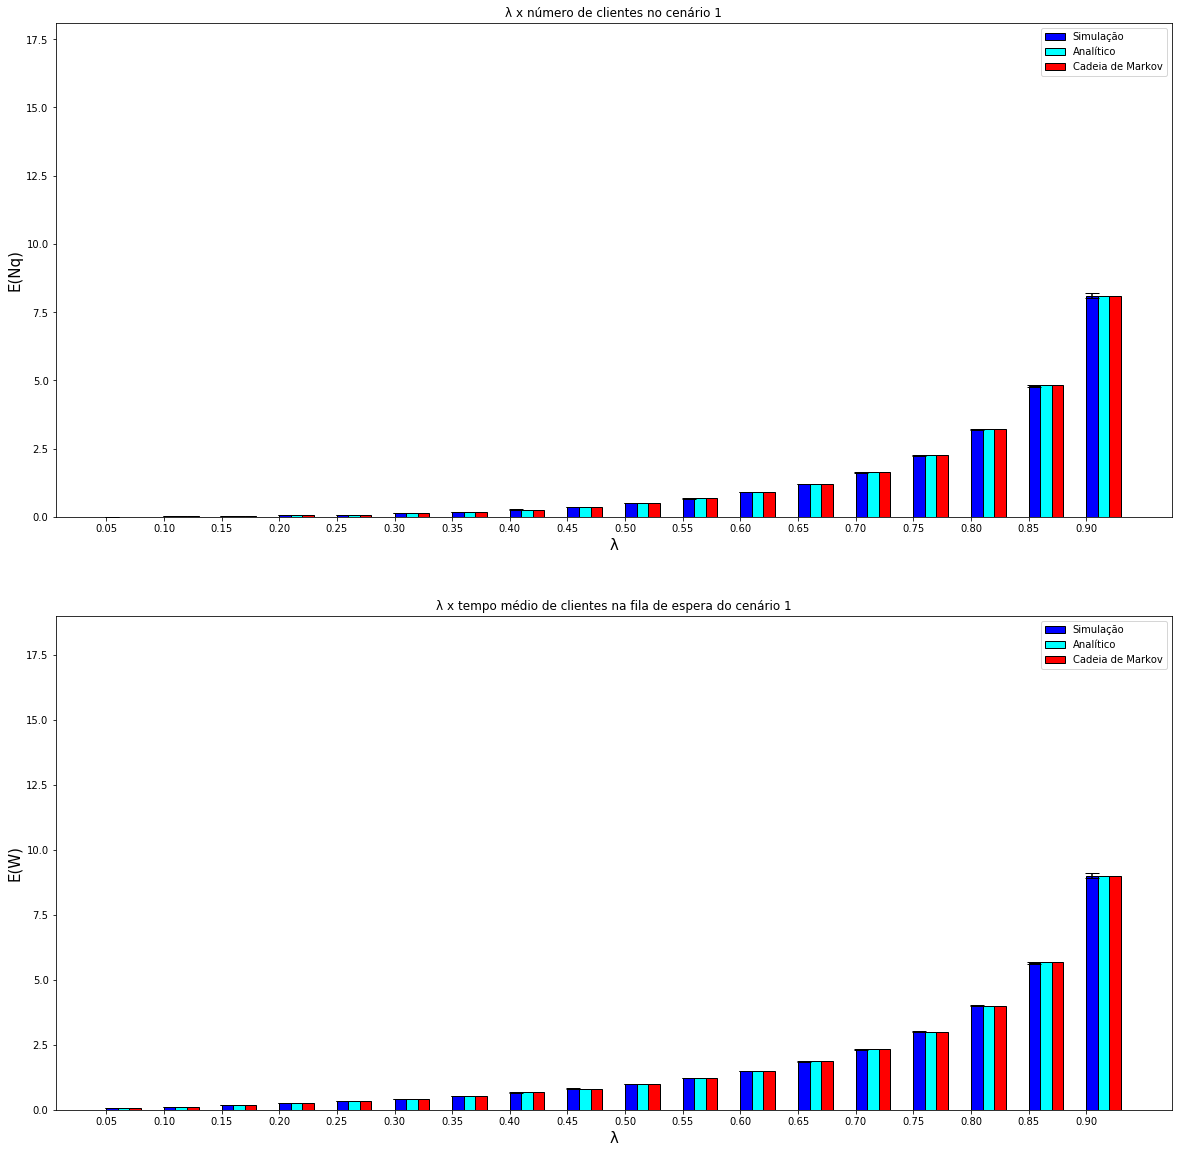

In [0]:
resultCenario1.append(resultCMCenario1[0])
resultCenario1.append(resultCMCenario1[1])
printGraficoQ3(1, resultCenario1, 95)

### Cenário 2

#### Simulação e solução analítica

In [0]:
from prettytable import PrettyTable

def simulaCenario2():
  medias_Nq = [] 
  medias_NqAnalitico = [] #Resultados Analíticos Nq_barra
  medias_W = []
  medias_WAnalitico = [] #Resultados Analíticos W_barra
  medias_N = []
  medias_X = []
  medias_T = []
  ρs = []

  λs = []

  confsNq = []
  confsW = []
  confsN = []
  confsX = []
  confsρ = []
  confsT = []

  resultCenario2 = []
  for i in range(5, 65, 5): # Para cada λ1 do cenário 1 
    λ = 0.01 * i  # Gera o λ1  
    λs.append(λ) # Guarda os λ num array

    result = simulaGeral(λ , 0.2, 1, 0.5, 1000) # Faz a simulação para cada λ
    resultaAnalitico = analiticoMM1(λ , 0.2, 1, 0.5)
    
    medias_Nq.append(result[1]) # Guarda o valor do E(Nq) para cada λ 
    medias_W.append(result[3]) # Guarda o valor do E(W) para cada λ
    medias_N.append(result[4])
    medias_X.append(result[5])
    ρs.append(result[6])
    medias_T.append(result[7])
    medias_NqAnalitico.append(resultaAnalitico[0]) # Guarda o valor do E(Nq) usando Little para cada λ
    medias_WAnalitico.append(resultaAnalitico[1]) # Guarda o valor do E(W) usando Little para cada λ
    confsNq.append(result[1] - result[0][0]) # Guarda o valor da diferença entre a média e um dos extremos do intervalo de confiança para cada λ
    confsW.append(result[3] - result[2][0])
    confsN.append(result[4] - result[8][0])
    confsX.append(result[5] - result[9][0])
    confsρ.append(result[6] - result[10][0])
    confsT.append(result[7] - result[11][0])
  
  # Salva tudo num array geral
  resultCenario2.append(λs)
  resultCenario2.append(medias_Nq)
  resultCenario2.append(confsNq)
  resultCenario2.append(medias_W)
  resultCenario2.append(medias_NqAnalitico)
  resultCenario2.append(confsW)
  resultCenario2.append(medias_N)
  resultCenario2.append(medias_X)
  resultCenario2.append(ρs)
  resultCenario2.append(medias_T)
  resultCenario2.append(confsN)
  resultCenario2.append(confsX)
  resultCenario2.append(confsρ)
  resultCenario2.append(confsT)
  resultCenario2.append(medias_WAnalitico)


  return resultCenario2
  
   
resultCenario2 = simulaCenario2()
#print(resultCenario1[6])

# Tabela 1
tabelaCenario2 = PrettyTable()
tabelaCenario2.header = True
nomes_colunas = ['λ', 'Nº de clientes; (Intervalo de confiança)', 'E[X]; (Intervalo de confiança)', 'E[W]; (Intervalo de confiança)', 'E[T]; (Intervalo de confiança)', 'ρ; (Intervalo de confiança)', 'E[Nq]; (Intervalo de confiança)']

tabelaCenario2.add_column(nomes_colunas[0], [ round(lambd,2) for lambd in resultCenario2[0] ], align='c')
tabelaCenario2.add_column(nomes_colunas[1], [ f"{round(resultCenario2[6][i],5)}; ({round(resultCenario2[6][i]-resultCenario2[10][i],5)}, {round(resultCenario2[6][i]+resultCenario2[10][i],5)})" for i in range(len(resultCenario2[6])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[2], [ f"{round(resultCenario2[7][i],5)}; ({round(resultCenario2[7][i]-resultCenario2[11][i],5)}, {round(resultCenario2[7][i]+resultCenario2[11][i],5)})" for i in range(len(resultCenario2[7])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[3], [ f"{round(resultCenario2[3][i],5)}; ({round(resultCenario2[3][i]-resultCenario2[5][i],5)}, {round(resultCenario2[3][i]+resultCenario2[5][i],5)})" for i in range(len(resultCenario2[3])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[4], [ f"{round(resultCenario2[9][i],5)}; ({round(resultCenario2[9][i]-resultCenario2[13][i],5)}, {round(resultCenario2[9][i]+resultCenario2[13][i],5)})" for i in range(len(resultCenario2[9])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[5], [ f"{round(resultCenario2[8][i],5)}; ({round(resultCenario2[8][i]-resultCenario2[12][i],5)}, {round(resultCenario2[8][i]+resultCenario2[12][i],5)})" for i in range(len(resultCenario2[8])) ], align='c' )
tabelaCenario2.add_column(nomes_colunas[6], [ f"{round(resultCenario2[1][i],5)}; ({round(resultCenario2[1][i]-resultCenario2[2][i],5)}, {round(resultCenario2[1][i]+resultCenario2[2][i],5)})" for i in range(len(resultCenario2[1])) ], align='c' )


print(tabelaCenario2.get_string(title="Resultados do Cenário 2 - Simulação"))

# Tabela 2
#tabela2Cenario2 = PrettyTable()
#nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

#tabela2Cenario2.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario2[0] ])
#tabela2Cenario2.add_column(nomes_colunas2[1], [ f"{round(resultCenario2[1][i],5)}; ({round(resultCenario2[1][i]-resultCenario2[2][i],5)}, {round(resultCenario2[1][i]+resultCenario2[2][i],5)})" for i in range(len(resultCenario2[1])) ])
#tabela2Cenario2.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario2[4] ])


#print(tabela2Cenario2.get_string(title="Resultados do Cenário 2 - Simulação e solução analítica"))

# Tabela 3
#tabela3Cenario2 = PrettyTable()
#nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']

#tabela3Cenario2.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario2[0] ])
#tabela3Cenario2.add_column(nomes_colunas3[1], [ f"{round(resultCenario2[3][i],5)}; ({round(resultCenario2[3][i]-resultCenario2[5][i],5)}, {round(resultCenario2[3][i]+resultCenario2[5][i],5)})" for i in range(len(resultCenario2[3])) ])
#tabela3Cenario2.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario2[14] ])


#print(tabela3Cenario2.get_string(title="Resultados do Cenário 1 - Simulação e solução analítica"))

+------+------------------------------------------+--------------------------------+----------------------------------+----------------------------------+-----------------------------+---------------------------------+
|  λ   | Nº de clientes; (Intervalo de confiança) | E[X]; (Intervalo de confiança) |  E[W]; (Intervalo de confiança)  |  E[T]; (Intervalo de confiança)  | ρ; (Intervalo de confiança) | E[Nq]; (Intervalo de confiança) |
+------+------------------------------------------+--------------------------------+----------------------------------+----------------------------------+-----------------------------+---------------------------------+
| 0.05 |    4999.235; (4994.81642, 5003.65358)    |  1.79953; (1.79783, 1.80123)   |   1.53965; (1.53202, 1.54728)    |   3.33918; (3.33049, 3.34788)    | 0.44975; (0.44917, 0.45032) |   0.38491; (0.38301, 0.38682)   |
| 0.1  |    5998.271; (5993.64168, 6002.90032)    |  1.66617; (1.66471, 1.66763)   |   1.79422; (1.78557, 1.80287)    |   3.

#### Cadeia de Markov
FILA<br>
<img src = "https://drive.google.com/uc?export=view&id=1zw5Z2vQFz63OOK7rM5yDbrHrtliNeGpm"/>

<br>
CADEIA <br>
Os estados representam o tipo de cliente no sistema e quantos clientes de cada tipo.
Do lado esquerdo da vírgula são representados o número de clientes do tipo 1 e do lado direito o número de clientes do tipo 2.

<img src = "https://drive.google.com/uc?export=view&id=1P5WOI6-CwiZ2n_47yUPQcAzYpp6AMFCf"/>

O código abaixo se refere à Cadeia de Markov em que não estávamos levando em consideração a ordem das pessoas na fila. Como faz parte do trabalho relatar tudo o que fizemos, achamos válido colocar o código e a figura representativa da cadeia mesmo não os utilizando.

In [0]:
# Cadeia de Markov Cenário 2
# Não estamos usando, pois essa não é a melhor abordagem de cadeia para resolver a questão

import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
import numpy.linalg as lin

# Gera o nome dos estados
def get_state_name(f1, f2):
    return f"{f1:5}/{f2:5}"

# Gera os estados adjacentes
def get_next_states(f1, f2, λ1, λ2, µ1, µ2):
    r = {}
    
    # Chegada de um cliente do tipo 1:
    r[get_state_name(f1+1,f2)] = λ1
    
    # Chegada de um cliente do tipo 2:
    if(λ2 == 0.0):
      r[get_state_name(f1,0)] = λ2
    else:
      r[get_state_name(f1,f2+1)] = λ2
    
    # Saida de um cliente do tipo 1:
    if(f1 != 0):
      r[get_state_name(f1-1,f2)] = µ1
    
    # Saida de um cliente do tipo 2:
    if(f2 != 0):
      r[get_state_name(f1,f2-1)] = µ2

    return r

# Cria os estados da Cadeia de Markov
def create_ctmc_states(size, λ1, λ2, µ1, µ2):
    states = {}

    # Adiciona o estado " 0 / 0 "
    states[get_state_name(0,0)] = get_next_states(0,0, λ1, λ2, µ1, µ2)

    for f1 in range(0,size):
      for f2 in range(0,size):
        if(λ2 == 0):
          states[get_state_name(f1,0)] = get_next_states(f1,0, λ1, λ2, µ1, µ2)
          break;
        states[get_state_name(f1,f2)] = get_next_states(f1,f2, λ1, λ2, µ1, µ2)

    return states

# Gera a matriz referente a Cadeia de Markov
def create_ctmc_matrix(size, λ1, λ2, µ1, µ2):
    states = create_ctmc_states(size, λ1, λ2, µ1, µ2)
    df = pd.DataFrame(states)
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.sort_index()
    df = df.transpose()
    df = df[df.index]
    columns = df.columns
    np.fill_diagonal(df.values, -df.sum(axis=1))
    df = df.fillna(0)
    #print(columns)
    return df.to_numpy(), columns

# Calcula os π
def calculaCadeiaMarkovCenario2(λ1, λ2, µ1, µ2):

  result = create_ctmc_matrix(40, λ1, λ2, µ1, µ2)
  Q = result[0]
  columns = result[1]

  # Trecho a seguir calcula os π
  sz = Q.shape[0]
  Qt = Q.transpose()
  Qt[sz-1,:] = 1
  b = np.zeros((sz,1))
  b[sz-1] = 1
  x = lin.solve(Qt.T.dot(Qt), Qt.T.dot(b))


  πi = {}

  # Agrupa os πi que apresentam o mesmo número de pessoas no sistema para um único π
  for i in range(len(columns)):
    txt = columns[i].split(",")
    for k in range(len(txt)):
      txt2 = txt[k].split("/")
      numberCustumerSystem = int(txt2[0])+int(txt2[1])
      if numberCustumerSystem in πi:
        πi[numberCustumerSystem] = x[i] + πi[numberCustumerSystem]
      else:
        πi[numberCustumerSystem] = x[i]

  return list(πi.values())   


def CadeiaMarkovCenario2():
  Nqs = []
  W = []
  Nq = 0
  for i in range(5, 65, 5):
    λ1 = 0.01 * i
    λ2 = 0.2
    µ1 = 1
    µ2 = 0.5
    πk = (calculaCadeiaMarkovCenario2(λ1, λ2, µ1, µ2))
    Nq = 0

    # Faz os cálculos dos Nq e W
    for j in range(1,len(πk)):
      if(πk[j] < 0):
        Nq += 0
      else:
        Nq += (j-1)*πk[j]
    Nqs.append(Nq[0])
    W.append(Nq[0]/(λ1+λ2))   

  return [Nqs, W]

#resultCMCenario2 = CadeiaMarkovCenario2()
#print(resultCMCenario2[0])
#print(resultCMCenario2[1])

O código abaixo se refere à Cadeia de Markov em que não estávamos levando em consideração a ordem das pessoas na fila e que usamos a abordagem de usar a matriz de probabilidade de transição. Como faz parte do trabalho relatar tudo o que fizemos, achamos válido colocar o código mesmo não o utilizando.

In [0]:
# Cadeia de Markov Cenário 2 - Abordagem com matriz de probabilidade de transição
# Não estamos usando, pois essa não é a melhor abordagem de cadeia para resolver a questão e não houve diferença com a abordagem anterior

import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
import numpy.linalg as lin

# Gera o nome dos estados
def get_state_name(f1, f2):
    return f"{f1:5}/{f2:5}"

# Gera os estados adjacentes
def get_next_states(f1, f2, λ1, λ2, µ1, µ2):
    r = {}
    
    # Chegada de um cliente do tipo 1:
    r[get_state_name(f1+1,f2)] = λ1
    
    # Chegada de um cliente do tipo 2:
    if(λ2 == 0.0):
      r[get_state_name(f1,0)] = λ2
    else:
      r[get_state_name(f1,f2+1)] = λ2
    
    # Saida de um cliente do tipo 1:
    if(f1 != 0):
      r[get_state_name(f1-1,f2)] = µ1
    
    # Saida de um cliente do tipo 2:
    if(f2 != 0):
      r[get_state_name(f1,f2-1)] = µ2

    return r

# Cria os estados da Cadeia de Markov
def create_ctmc_states(size, λ1, λ2, µ1, µ2):
    states = {}

    # Adiciona o estado " 0 / 0 "
    states[get_state_name(0,0)] = get_next_states(0,0, λ1, λ2, µ1, µ2)

    for f1 in range(0,size):
      for f2 in range(0,size):
        if(λ2 == 0):
          states[get_state_name(f1,0)] = get_next_states(f1,0, λ1, λ2, µ1, µ2)
          break;
        states[get_state_name(f1,f2)] = get_next_states(f1,f2, λ1, λ2, µ1, µ2)

    return states

# Gera a matriz referente a Cadeia de Markov
def create_ctmc_matrix(size, λ1, λ2, µ1, µ2):
    states = create_ctmc_states(size, λ1, λ2, µ1, µ2)
    df = pd.DataFrame(states)
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.sort_index()
    df = df.transpose()
    df = df[df.index]
    columns = df.columns
    np.fill_diagonal(df.values, -df.sum(axis=1))
    df = df.fillna(0)
    return df.to_numpy(), columns

# Calcula os π
def calculaCadeiaMarkovCenario2(λ1, λ2, µ1, µ2):
  result = create_ctmc_matrix(40, λ1, λ2, µ1, µ2)
  Q = result[0]
  columns = result[1]

  # Transforma a matriz de taxa de transição na matriz de taxa de probabilidade
  P = (Q/(λ1+λ2+µ1+µ2)) + np.identity(Q.shape[0])

  # Eleva a matriz de taxa de probabilidade a uma potência grande
  Pn = matrix_power(P, 1000000000)
  x = []

  # Trecho a seguir calcula os π
  for i in range(0,Pn.shape[0]):
    x.append(Pn[0][i])
  x = np.array([x]).T

  πi = {}

  # Agrupa os πi que apresentam o mesmo número de pessoas no sistema para um único π
  for i in range(len(columns)):
    txt = columns[i].split(",")
    for k in range(len(txt)):
      txt2 = txt[k].split("/")
      numberCustumerSystem = int(txt2[0])+int(txt2[1])
      if numberCustumerSystem in πi:
        πi[numberCustumerSystem] = x[i] + πi[numberCustumerSystem]
      else:
        πi[numberCustumerSystem] = x[i]

  return list(πi.values())   

def CadeiaMarkovCenario2():
  Nqs = []
  W = []
  Nq = 0

  for i in range(5, 65, 5):
    λ1 = 0.01 * i
    λ2 = 0.2
    µ1 = 1
    µ2 = 0.5
    πk = (calculaCadeiaMarkovCenario2(λ1, λ2, µ1, µ2))
    Nq = 0

    # Faz os cálculos dos Nq e W
    for j in range(1,len(πk)):
      if(πk[j] < 0):
        Nq += 0
      else:
        Nq += (j-1)*πk[j]
    Nqs.append(Nq[0])
    W.append(Nq[0]/(λ1+λ2))   

  return [Nqs, W]

#resultCMCenario2 = CadeiaMarkovCenario2()


Alternativa de Cadeia de Markov, em que a ordem da chegada dos clientes importa

CADEIA <br>
Cada estado representa a fila de clientes em ordem de chegada de cada cliente, em que o número 1 é o cliente do tipo 1 e o número 2 é o cliente do tipo 2. O cliente que aparece na extrema direita desse estado é o que está sendo servido, os demais estão na fila de espera. Assim, o estado 221 significa, por exemplo, que chegou um cliente do tipo 1 primeiro - e este está sendo servido -  e depois dois clientes do tipo 2 chegaram e estão na fila de espera. O estado 0 significa que não há clientes na fila. 
<img src = "https://drive.google.com/uc?export=view&id=1tNH7n7xKjMC75sN-Juw119UHF-SL62GU"/>




O código abaixo se refere à Cadeia de Markov em que estamos levando em consideração a ordem das pessoas na fila. Estamos utilizando o código abaixo para obter os resultados.

In [0]:
# Cadeia de Markov Cenário 2 - Abordagem de uma CM em que a ordem das chegadas dos clientes importa

import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
import numpy.linalg as lin
import matplotlib.pyplot as plt

def get_state_id(array, size):
    return tuple(array + [0]*(size - len(array)))



# Gera os estados adjacentes
def get_next_states(f, λ1, λ2, µ1, µ2, size):
    r = {}
    f = [i for i in f if i > 0]
    
    # Chegada de um cliente do tipo 1
    if λ1 > 0:
        r[get_state_id(f + [1], size)] = λ1
    # Chegada de um cliente do tipo 2
    if λ2 > 0:
        r[get_state_id(f + [2], size)] = λ2
    
    # Saida de um cliente do tipo 1
    if µ1 > 0 and len(f) > 0 and f[0] == 1:
        r[get_state_id(f[1:], size)] = µ1
    # Saida de um cliente do tipo 2
    if µ1 > 0 and len(f) > 0 and f[0] == 2:
        r[get_state_id(f[1:], size)] = µ2

    return r


# Cria os estados da Cadeia de Markov
def create_ctmc_states(size, λ1, λ2, µ1, µ2):
    states = {}
    queue = [tuple([0]*size)]

    while len(queue) > 0:
        f = queue.pop(0)
        n = get_next_states(f, λ1, λ2, µ1, µ2, size)
        queue.extend([list(i) for i in n.keys() if len(i) <= size and i not in states])
        states[tuple(f)] = {k:v for (k,v) in n.items() if len(k) <= size}

    return states    


# Gera a matriz referente a Cadeia de Markov
def create_ctmc_matrix(size, λ1, λ2, µ1, µ2):
    states = create_ctmc_states(size, λ1, λ2, µ1, µ2)
    df = pd.DataFrame(states)
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.sort_index()
    df = df.transpose()
    df = df[df.index]
    columns = df.columns
    np.fill_diagonal(df.values, -df.sum(axis=1))
    df = df.fillna(0)
    return df.to_numpy(), columns


def get_ctmc_stationary_state(Q):
    sz = Q.shape[0]
    Qt = Q.transpose()
    Qt[sz-1,:] = 1
    b = np.zeros((sz,1))
    b[sz-1] = 1
    x = lin.solve(Qt, b)
    return x


def get_pi_N(steady_state, states):
    df_steady_state = pd.DataFrame(steady_state, index=states)
    get_N_from_state = lambda ix: sum(x > 0 for x in ix)
    df_steady_state_N = df_steady_state.set_index(df_steady_state.index.map(get_N_from_state))
    df_steady_state_N = df_steady_state_N.groupby(df_steady_state_N.index).agg(sum)
    return df_steady_state_N[0].reindex(range(df_steady_state_N[0].index.max() + 1)).ffill(0).to_numpy()


def calculaCadeiaMarkovCenario2(λ1, sz):
    #print("create_ctmc_matrix")
    λ2 = 0.2
    µ1 = 1
    µ2 = 0.5
    Q, columns = create_ctmc_matrix(sz, λ1, λ2, µ1, µ2)
    #print("get_ctmc_stationary_state")
    π = get_ctmc_stationary_state(Q)
    #print("get_pi_N")
    πk = get_pi_N(π, columns)
    return πk


def CadeiaMarkovCenario2():
    Nqs = []
    W = []
    Nq = 0
    for i in np.linspace(0.05, 0.6, 12):
        #print("λ1:", i)
        λ1 = i
        λ2 = 0.2
        πk = calculaCadeiaMarkovCenario2(λ1, 10)

        # Faz os cálculos dos Nq e W
        r = np.array([0] + list(range(len(πk) - 1)))
        Nq = πk.dot(r)
        Nqs.append(Nq)
        W.append(Nq/(λ1+λ2))

    return Nqs, W

resultCMCenario2 = CadeiaMarkovCenario2()

print("E[Nqs]:",resultCMCenario2[0])
print("E[Ws]:",resultCMCenario2[1])

E[Nqs]: [0.38415812169026686, 0.531892242935498, 0.7146974348172122, 0.9374835710105527, 1.2040737516304063, 1.5163248974147967, 1.8732511406898977, 2.270397746840788, 2.6997388042512886, 3.1502691277020114, 3.6092398441705544, 4.063746455965408]
E[Ws]: [1.5366324867610675, 1.7729741431183264, 2.0419926709063208, 2.3437089275263814, 2.6757194480675697, 3.0326497948295934, 3.405911164890723, 3.7839962447346465, 4.153444314232752, 4.500384468145731, 4.812319792227406, 5.07968306995676]


O código abaixo se refere à Cadeia de Markov em que estamos levando em consideração a ordem das pessoas na fila e que usamos a abordagem de usar a matriz de probabilidade de transição. Como não foi observada diferença em relação ao código acima, não estamos fazendo uso do mesmo.

In [0]:
# Cadeia de Markov Cenário 2 - Abordagem de uma CM em que a ordem das chegadas dos clientes importa e com matriz de probabilidade de transição
# Não estamos usando, pois não houve diferença com a abordagem anterior


import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
import numpy.linalg as lin
import matplotlib.pyplot as plt

def get_state_id(array, size):
    return tuple(array + [0]*(size - len(array)))



# Gera os estados adjacentes
def get_next_states(f, λ1, λ2, µ1, µ2, size):
    r = {}
    f = [i for i in f if i > 0]
    
    # Chegada de um cliente do tipo 1
    if λ1 > 0:
        r[get_state_id(f + [1], size)] = λ1
    # Chegada de um cliente do tipo 2
    if λ2 > 0:
        r[get_state_id(f + [2], size)] = λ2
    
    # Saida de um cliente do tipo 1
    if µ1 > 0 and len(f) > 0 and f[0] == 1:
        r[get_state_id(f[1:], size)] = µ1
    # Saida de um cliente do tipo 2
    if µ1 > 0 and len(f) > 0 and f[0] == 2:
        r[get_state_id(f[1:], size)] = µ2

    return r


# Cria os estados da Cadeia de Markov
def create_ctmc_states(size, λ1, λ2, µ1, µ2):
    states = {}
    queue = [tuple([0]*size)]

    while len(queue) > 0:
        f = queue.pop(0)
        n = get_next_states(f, λ1, λ2, µ1, µ2, size)
        queue.extend([list(i) for i in n.keys() if len(i) <= size and i not in states])
        states[tuple(f)] = {k:v for (k,v) in n.items() if len(k) <= size}

    return states    


# Gera a matriz referente a Cadeia de Markov
def create_ctmc_matrix(size, λ1, λ2, µ1, µ2):
    states = create_ctmc_states(size, λ1, λ2, µ1, µ2)
    df = pd.DataFrame(states)
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.sort_index()
    df = df.transpose()
    df = df[df.index]
    columns = df.columns
    np.fill_diagonal(df.values, -df.sum(axis=1))
    df = df.fillna(0)
    return df.to_numpy(), columns


def get_ctmc_stationary_state(Q, λ1, λ2, µ1, µ2):
    P = (Q/(λ1+λ2+µ1+µ2)) + np.identity(Q.shape[0])
    Pn = matrix_power(P, 1000000000)
    x = []

    # Trecho a seguir calcula os π
    for i in range(0,Pn.shape[0]):
      x.append(Pn[0][i])
    x = np.array([x]).T

    return x


def get_pi_N(steady_state, states):
    df_steady_state = pd.DataFrame(steady_state, index=states)
    get_N_from_state = lambda ix: sum(x > 0 for x in ix)
    df_steady_state_N = df_steady_state.set_index(df_steady_state.index.map(get_N_from_state))
    df_steady_state_N = df_steady_state_N.groupby(df_steady_state_N.index).agg(sum)
    return df_steady_state_N[0].reindex(range(df_steady_state_N[0].index.max() + 1)).ffill(0).to_numpy()


def calculaCadeiaMarkovCenario2(λ1, sz):
    #print("create_ctmc_matrix")
    λ2 = 0.2
    µ1 = 1
    µ2 = 0.5
    Q, columns = create_ctmc_matrix(sz, λ1, λ2, µ1, µ2)
    #print("get_ctmc_stationary_state")
    π = get_ctmc_stationary_state(Q, λ1, λ2, µ1, µ2)
    #print("get_pi_N")
    πk = get_pi_N(π, columns)
    return πk


def CadeiaMarkovCenario2():
    Nqs = []
    W = []
    Nq = 0
    for i in np.linspace(0.05, 0.6, 12):
        #print("λ1:", i)
        λ1 = i
        λ2 = 0.2
        πk = calculaCadeiaMarkovCenario2(λ1, 10)

        # Faz os cálculos dos Nq e W
        r = np.array([0] + list(range(len(πk) - 1)))
        Nq = πk.dot(r)
        Nqs.append(Nq)
        W.append(Nq/(λ1+λ2))

    return Nqs, W

#resultCMCenario2 = CadeiaMarkovCenario2()
#print("Nqs:",resultCMCenario2[0])
#print("Ws:",resultCMCenario2[1])

#### Comparação

In [0]:
# Tabela 2
tabela2Cenario2 = PrettyTable()
nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]', 'Cadeia de Markov: E[Nq]']

tabela2Cenario2.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario2[0] ])
tabela2Cenario2.add_column(nomes_colunas2[1], [ f"{round(resultCenario2[1][i],5)}; ({round(resultCenario2[1][i]-resultCenario2[2][i],5)}, {round(resultCenario2[1][i]+resultCenario2[2][i],5)})" for i in range(len(resultCenario2[1])) ])
tabela2Cenario2.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario2[4] ])
tabela2Cenario2.add_column(nomes_colunas2[3], [ round(item,5) for item in resultCMCenario2[0] ] )

print(tabela2Cenario2.get_string(title="Resultados do Cenário 2 - Simulação, solução analítica e cadeia"))

# Tabela 3
tabela3Cenario2 = PrettyTable()
nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]', 'Cadeia de Markov: E[W]']

tabela3Cenario2.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario2[0] ])
tabela3Cenario2.add_column(nomes_colunas3[1], [ f"{round(resultCenario2[3][i],5)}; ({round(resultCenario2[3][i]-resultCenario2[5][i],5)}, {round(resultCenario2[3][i]+resultCenario2[5][i],5)})" for i in range(len(resultCenario2[3])) ])
tabela3Cenario2.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario2[14] ])
tabela3Cenario2.add_column(nomes_colunas3[3], [ round(item,5) for item in resultCMCenario2[1] ])


print(tabela3Cenario2.get_string(title="Resultados do Cenário 2 - Simulação, solução analítica e cadeia"))

+------+--------------------------------------------+------------------+-------------------------+
|  λ   | Simulação: E[Nq]; (Intervalo de confiança) | Analítico: E[Nq] | Cadeia de Markov: E[Nq] |
+------+--------------------------------------------+------------------+-------------------------+
| 0.05 |        0.38491; (0.38301, 0.38682)         |     0.36818      |         0.38416         |
| 0.1  |        0.53826; (0.53567, 0.54086)         |       0.5        |         0.53189         |
| 0.15 |         0.73752; (0.734, 0.74104)          |     0.67222      |          0.7147         |
| 0.2  |        1.00075; (0.99578, 1.00571)         |       0.9        |         0.93748         |
| 0.25 |        1.35372; (1.34657, 1.36088)         |     1.20714      |         1.20407         |
| 0.3  |        1.83473; (1.82471, 1.84475)         |     1.63333      |         1.51632         |
| 0.35 |        2.52697; (2.51082, 2.54311)         |       2.25       |         1.87325         |
| 0.4  |  

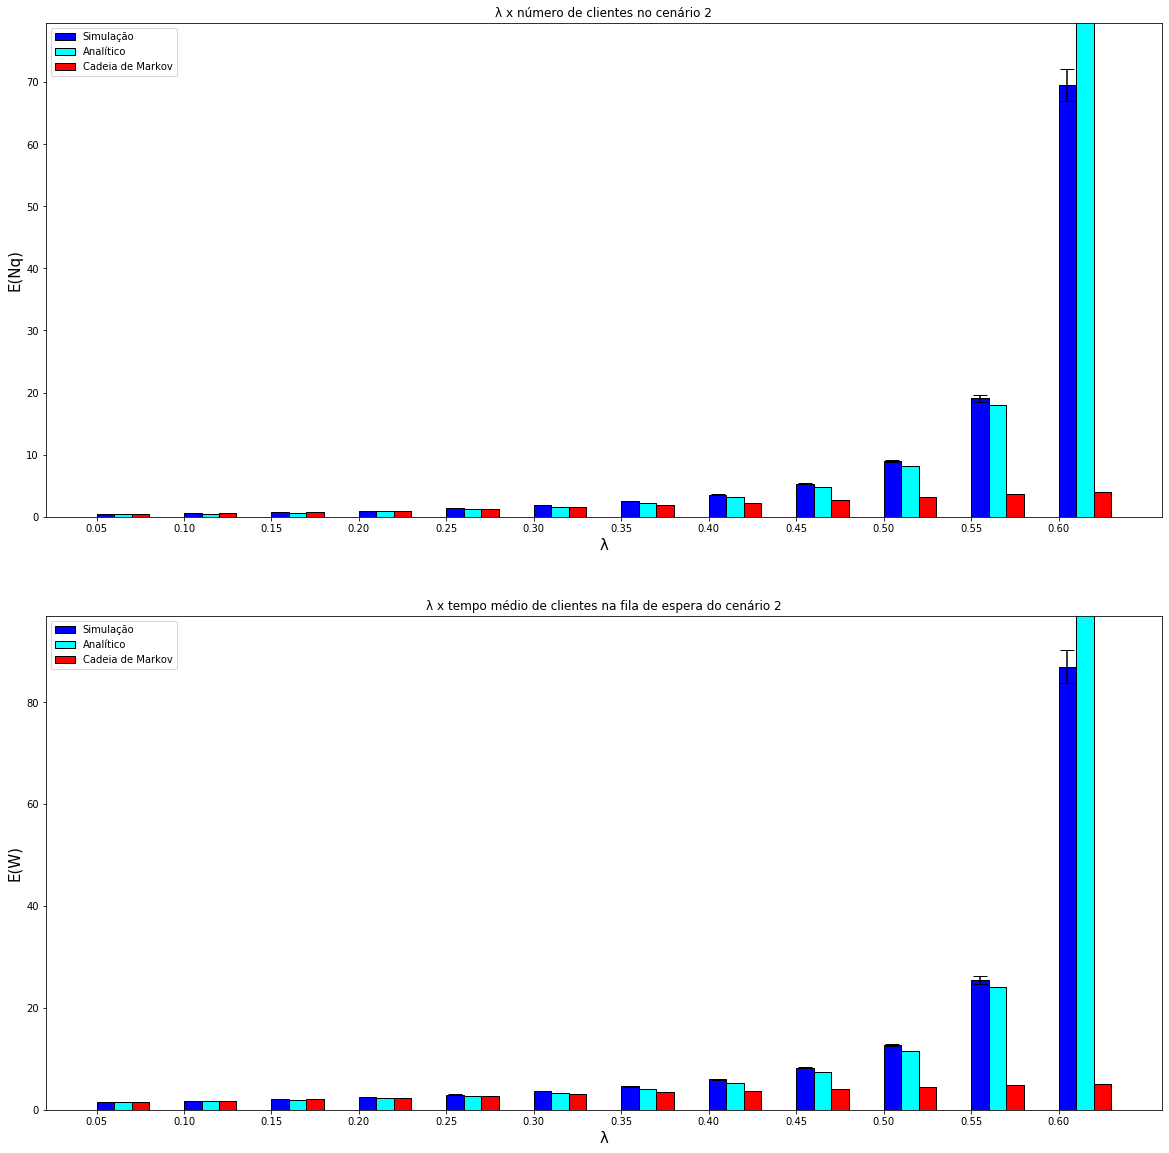

In [0]:
resultCenario2.append(resultCMCenario2[0])
resultCenario2.append(resultCMCenario2[1])
#print(resultCenario2)
printGraficoQ3(2, resultCenario2, 65)

### Cenário 3

#### Simulação e solução analítica

In [0]:
def deterministica(L):
  return 1/L

def simulaCenario3():
  medias_Nq = [] 
  medias_NqAnalitico = [] #Resultados Analíticos Nq_barra
  medias_W = []
  medias_WAnalitico = [] #Resultados Analíticos W_barra
  medias_N = []
  medias_X = []
  medias_T = []
  ρs = []

  λs = []
  confsNq = []
  confsW = []
  confsN = []
  confsX = []
  confsρ = []
  confsT = []

  resultCenario3 = []
  for i in range(5, 65, 5): # Para cada λ1 do cenário 1 
    λ = 0.01 * i  # Gera o λ1  
    λs.append(λ) # Guarda os λ num array

    result = simulaGeral(λ , 0.2, 1, 0.5, 1000, deterministica) # Faz a simulação para cada λ
    resultaAnalitico = analiticoMD1(λ , 0.2, 1, 0.5)
    
    medias_Nq.append(result[1]) # Guarda o valor do E(Nq) para cada λ 
    medias_W.append(result[3]) # Guarda o valor do E(W) para cada λ
    medias_N.append(result[4])
    medias_X.append(result[5])
    ρs.append(result[6])
    medias_T.append(result[7])
    medias_NqAnalitico.append(resultaAnalitico[0]) # Guarda o valor do E(Nq) usando Little para cada λ
    medias_WAnalitico.append(resultaAnalitico[1]) # Guarda o valor do E(W) usando Little para cada λ
    confsNq.append(result[1] - result[0][0]) # Guarda o valor da diferença entre a média e um dos extremos do intervalo de confiança para cada λ
    confsW.append(result[3] - result[2][0])
    confsN.append(result[4] - result[8][0])
    confsX.append(result[5] - result[9][0])
    confsρ.append(result[6] - result[10][0])
    confsT.append(result[7] - result[11][0])
  
  # Salva tudo num array geral
  resultCenario3.append(λs)
  resultCenario3.append(medias_Nq)
  resultCenario3.append(confsNq)
  resultCenario3.append(medias_W)
  resultCenario3.append(medias_NqAnalitico)
  resultCenario3.append(confsW)
  resultCenario3.append(medias_N)
  resultCenario3.append(medias_X)
  resultCenario3.append(ρs)
  resultCenario3.append(medias_T)
  resultCenario3.append(confsN)
  resultCenario3.append(confsX)
  resultCenario3.append(confsρ)
  resultCenario3.append(confsT)
  resultCenario3.append(medias_WAnalitico)

  return resultCenario3
  
   
resultCenario3 = simulaCenario3()
print(resultCenario3[4])

#Tabela 1 
tabelaCenario3 = PrettyTable()
nomes_colunas = ['λ', 'Nº de clientes; (Intervalo de confiança)', 'E[X]; (Intervalo de confiança)', 'E[W]; (Intervalo de confiança)', 'E[T]; (Intervalo de confiança)', 'ρ; (Intervalo de confiança)', 'E[Nq]; (Intervalo de confiança)']

tabelaCenario3.add_column(nomes_colunas[0], [ round(lambd,2) for lambd in resultCenario3[0] ], align='c')
tabelaCenario3.add_column(nomes_colunas[1], [ f"{round(resultCenario3[6][i],5)}; ({round(resultCenario3[6][i]-resultCenario3[10][i],5)}, {round(resultCenario3[6][i]+resultCenario3[10][i],5)})" for i in range(len(resultCenario3[6])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[2], [ f"{round(resultCenario3[7][i],5)}; ({round(resultCenario3[7][i]-resultCenario3[11][i],5)}, {round(resultCenario3[7][i]+resultCenario3[11][i],5)})" for i in range(len(resultCenario3[7])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[3], [ f"{round(resultCenario3[3][i],5)}; ({round(resultCenario3[3][i]-resultCenario3[5][i],5)}, {round(resultCenario3[3][i]+resultCenario3[5][i],5)})" for i in range(len(resultCenario3[3])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[4], [ f"{round(resultCenario3[9][i],5)}; ({round(resultCenario3[9][i]-resultCenario3[13][i],5)}, {round(resultCenario3[9][i]+resultCenario3[13][i],5)})" for i in range(len(resultCenario3[9])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[5], [ f"{round(resultCenario3[8][i],5)}; ({round(resultCenario3[8][i]-resultCenario3[12][i],5)}, {round(resultCenario3[8][i]+resultCenario3[12][i],5)})" for i in range(len(resultCenario3[8])) ], align='c' )
tabelaCenario3.add_column(nomes_colunas[6], [ f"{round(resultCenario3[1][i],5)}; ({round(resultCenario3[1][i]-resultCenario3[2][i],5)}, {round(resultCenario3[1][i]+resultCenario3[2][i],5)})" for i in range(len(resultCenario3[1])) ], align='c' )


print(tabelaCenario3.get_string(title="Resultados do Cenário 3 - Simulação"))

#Tabela 2
#tabela2Cenario3 = PrettyTable()
#nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

#tabela2Cenario3.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario3[0] ])
#tabela2Cenario3.add_column(nomes_colunas2[1], [ f"{round(resultCenario3[1][i],5)}; ({round(resultCenario3[1][i]-resultCenario3[2][i],5)}, {round(resultCenario3[1][i]+resultCenario3[2][i],5)})" for i in range(len(resultCenario3[1])) ])
#tabela2Cenario3.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario3[4] ])


#print(tabela2Cenario3.get_string(title="Resultados do Cenário 3 - Simulação e solução analítica"))

#Tabela 3
#tabela3Cenario3 = PrettyTable()
#nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']

#tabela3Cenario3.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario3[0] ])
#tabela3Cenario3.add_column(nomes_colunas3[1], [ f"{round(resultCenario3[3][i],5)}; ({round(resultCenario3[3][i]-resultCenario3[5][i],5)}, {round(resultCenario3[3][i]+resultCenario3[5][i],5)})" for i in range(len(resultCenario3[3])) ])
#tabela3Cenario3.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario3[14] ])


#print(tabela3Cenario3.get_string(title="Resultados do Cenário 3 - Simulação e solução analítica"))


[0.17045454545454541, 0.22500000000000003, 0.2994444444444444, 0.4000000000000002, 0.5372448979591837, 0.7291666666666665, 1.0083333333333335, 1.440000000000001, 2.1765151515151535, 3.6750000000000003, 8.221153846153857, 456.68571428571397]
+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
|  λ   | Nº de clientes; (Intervalo de confiança) | E[X]; (Intervalo de confiança) | E[W]; (Intervalo de confiança) | E[T]; (Intervalo de confiança) | ρ; (Intervalo de confiança) | E[Nq]; (Intervalo de confiança) |
+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
| 0.05 |     4999.234; (4994.9392, 5003.5288)     |   1.80015; (1.79979, 1.8005)   |   0.77354; (0.7707, 0.77638) 

####Cadeia de Markov

#### Comparação

In [0]:
# Tabela 2
tabela2Cenario3 = PrettyTable()
#nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]', 'Cadeia de Markov: E[Nq]']
nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

tabela2Cenario3.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario3[0] ])
tabela2Cenario3.add_column(nomes_colunas2[1], [ f"{round(resultCenario3[1][i],5)}; ({round(resultCenario3[1][i]-resultCenario3[2][i],5)}, {round(resultCenario3[1][i]+resultCenario3[2][i],5)})" for i in range(len(resultCenario3[1])) ])
tabela2Cenario3.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario3[4] ])
#tabela2Cenario3.add_column(nomes_colunas2[3], [ round(item,5) for item in resultCMCenario3[0] ] )

print(tabela2Cenario3.get_string(title="Resultados do Cenário 2 - Simulação, solução analítica e cadeia"))

# Tabela 3
tabela3Cenario3 = PrettyTable()
#nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]', 'Cadeia de Markov: E[W]']
nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']
tabela3Cenario3.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario3[0] ])
tabela3Cenario3.add_column(nomes_colunas3[1], [ f"{round(resultCenario3[3][i],5)}; ({round(resultCenario3[3][i]-resultCenario3[5][i],5)}, {round(resultCenario3[3][i]+resultCenario3[5][i],5)})" for i in range(len(resultCenario3[3])) ])
tabela3Cenario3.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario3[14] ])
#tabela3Cenario3.add_column(nomes_colunas3[3], [ round(item,5) for item in resultCMCenario3[1] ])


print(tabela3Cenario3.get_string(title="Resultados do Cenário 2 - Simulação, solução analítica e cadeia"))

+------+--------------------------------------------+------------------+
|  λ   | Simulação: E[Nq]; (Intervalo de confiança) | Analítico: E[Nq] |
+------+--------------------------------------------+------------------+
| 0.05 |        0.19339; (0.19268, 0.19409)         |     0.17045      |
| 0.1  |          0.27; (0.26901, 0.27099)          |      0.225       |
| 0.15 |         0.36938; (0.3681, 0.37065)         |     0.29944      |
| 0.2  |         0.4982; (0.49645, 0.49996)         |       0.4        |
| 0.25 |         0.6765; (0.67402, 0.67898)         |     0.53724      |
| 0.3  |         0.91629; (0.91268, 0.9199)         |     0.72917      |
| 0.35 |        1.26295; (1.25752, 1.26837)         |     1.00833      |
| 0.4  |        1.79473; (1.78578, 1.80367)         |       1.44       |
| 0.45 |        2.70745; (2.69107, 2.72383)         |     2.17652      |
| 0.5  |        4.52446; (4.48718, 4.56173)         |      3.675       |
| 0.55 |        9.94579; (9.79497, 10.09661)       

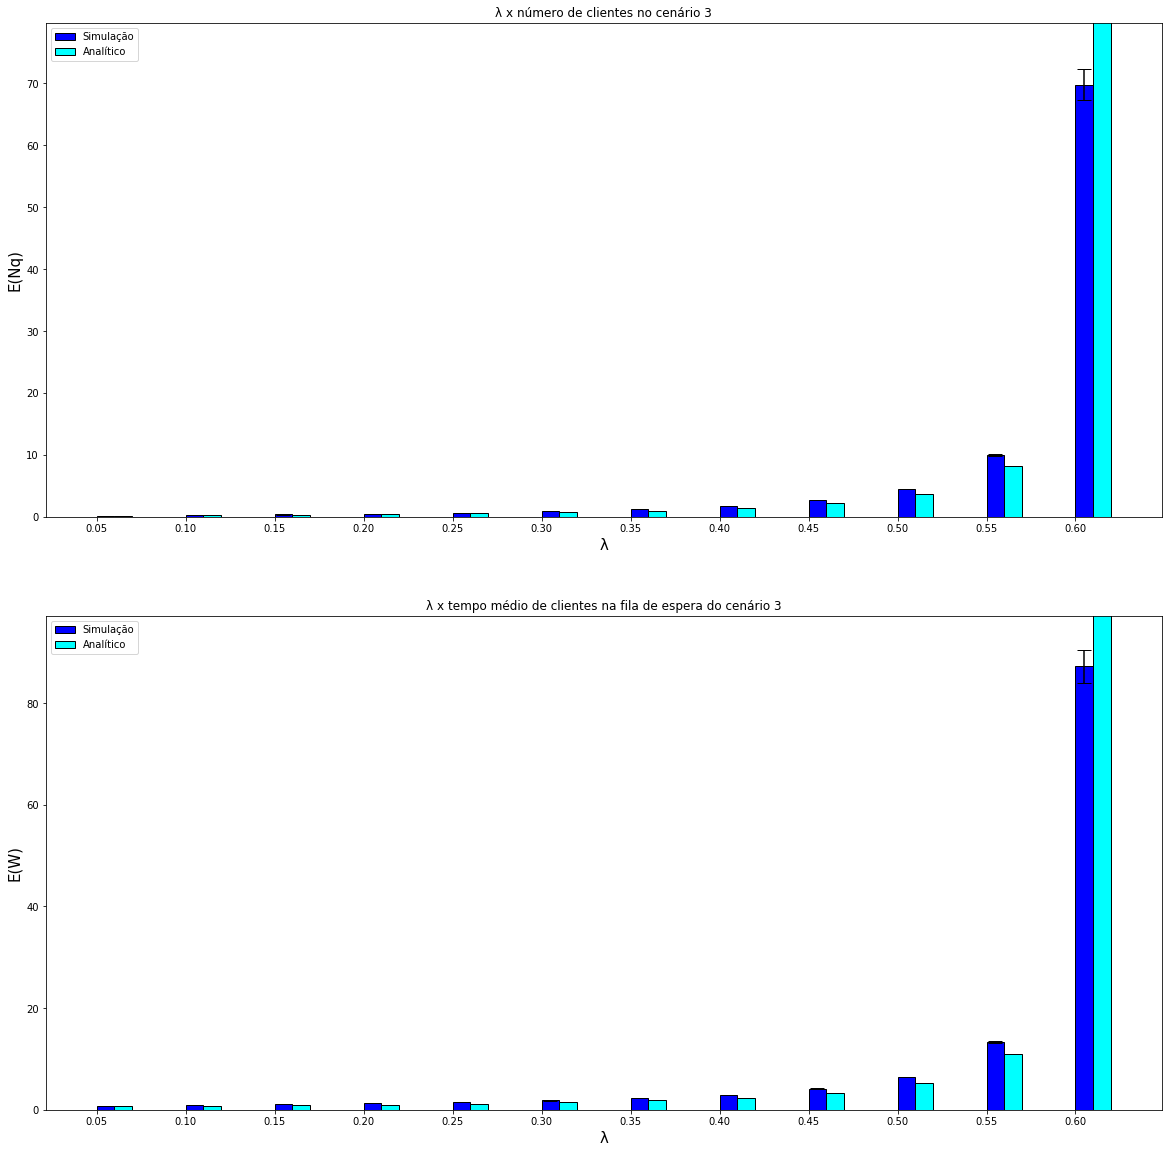

In [0]:
printGraficoQ3(3, resultCenario3, 65)

###Cenário 4

####Simulação e solução analítica

In [26]:
def uniforme(L):
  return random.uniform(L[0], L[1])

def simulaCenario4():
  medias_Nq = []
  medias_NqAnalitico = [] #Resultados Analíticos Nq_barra
  medias_W = []
  medias_WAnalitico = [] #Resultados Analíticos W_barra
  medias_N = []
  medias_X = []
  medias_T = []
  ρs = []

  λs = [0.08]
  confsNq = []
  confsW = []
  confsN = []
  confsX = []
  confsρ = []
  confsT = []
  resultCenario4 = []
    
  result = simulaGeral(0.08 , 0.05, [5,15], [1,3], 1000, uniforme) # Faz a simulação para cada λ
  resultaAnalitico = analiticoUniforme(0.08 , 0.05, 5, 15, 1, 3)  
  
  medias_Nq.append(result[1]) # Guarda o valor do E(Nq) para cada λ 
  medias_W.append(result[3]) # Guarda o valor do E(W) para cada λ
  medias_N.append(result[4])
  medias_X.append(result[5])
  ρs.append(result[6])
  medias_T.append(result[7])
  #medias_NqLittle.append(result[3]*(λs[0]+0.05)) # Guarda o valor do E(Nq) usando Little para cada λ
  medias_NqAnalitico.append(resultaAnalitico[0]) # Guarda o valor do E(Nq) usando Little para cada λ
  medias_WAnalitico.append(resultaAnalitico[1]) # Guarda o valor do E(W) usando Little para cada λ
  confsNq.append(result[1] - result[0][0]) # Guarda o valor da diferença entre a média e um dos extremos do intervalo de confiança para cada λ
  confsW.append(result[3] - result[2][0])
  confsN.append(result[4] - result[8][0])
  confsX.append(result[5] - result[9][0])
  confsρ.append(result[6] - result[10][0])
  confsT.append(result[7] - result[11][0])
  
  # Salva tudo num array geral
  resultCenario4.append(λs)
  resultCenario4.append(medias_Nq)
  resultCenario4.append(confsNq)
  resultCenario4.append(medias_W)
  resultCenario4.append(medias_NqAnalitico)
  resultCenario4.append(confsW)
  resultCenario4.append(medias_N)
  resultCenario4.append(medias_X)
  resultCenario4.append(ρs)
  resultCenario4.append(medias_T)
  resultCenario4.append(confsN)
  resultCenario4.append(confsX)
  resultCenario4.append(confsρ)
  resultCenario4.append(confsT)
  resultCenario4.append(medias_WAnalitico)


  return resultCenario4
  
   
resultCenario4 = simulaCenario4()

#Tabela 1
tabelaCenario4 = PrettyTable()
nomes_colunas = ['λ', 'Nº de clientes; (Intervalo de confiança)', 'E[X]; (Intervalo de confiança)', 'E[W]; (Intervalo de confiança)', 'E[T]; (Intervalo de confiança)', 'ρ; (Intervalo de confiança)', 'E[Nq]; (Intervalo de confiança)']

tabelaCenario4.add_column(nomes_colunas[0], [ round(lambd,2) for lambd in resultCenario4[0] ], align='c')
tabelaCenario4.add_column(nomes_colunas[1], [ f"{round(resultCenario4[6][i],5)}; ({round(resultCenario4[6][i]-resultCenario4[10][i],5)}, {round(resultCenario4[6][i]+resultCenario4[10][i],5)})" for i in range(len(resultCenario4[6])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[2], [ f"{round(resultCenario4[7][i],5)}; ({round(resultCenario4[7][i]-resultCenario4[11][i],5)}, {round(resultCenario4[7][i]+resultCenario4[11][i],5)})" for i in range(len(resultCenario4[7])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[3], [ f"{round(resultCenario4[3][i],5)}; ({round(resultCenario4[3][i]-resultCenario4[5][i],5)}, {round(resultCenario4[3][i]+resultCenario4[5][i],5)})" for i in range(len(resultCenario4[3])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[4], [ f"{round(resultCenario4[9][i],5)}; ({round(resultCenario4[9][i]-resultCenario4[13][i],5)}, {round(resultCenario4[9][i]+resultCenario4[13][i],5)})" for i in range(len(resultCenario4[9])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[5], [ f"{round(resultCenario4[8][i],5)}; ({round(resultCenario4[8][i]-resultCenario4[12][i],5)}, {round(resultCenario4[8][i]+resultCenario4[12][i],5)})" for i in range(len(resultCenario4[8])) ], align='c' )
tabelaCenario4.add_column(nomes_colunas[6], [ f"{round(resultCenario4[1][i],5)}; ({round(resultCenario4[1][i]-resultCenario4[2][i],5)}, {round(resultCenario4[1][i]+resultCenario4[2][i],5)})" for i in range(len(resultCenario4[1])) ], align='c' )


print(tabelaCenario4.get_string(title="Resultados do Cenário 4 - Simulação"))

#Tabela 2
#tabela2Cenario4 = PrettyTable()
#nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]']

#tabela2Cenario4.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario4[0] ])
#tabela2Cenario4.add_column(nomes_colunas2[1], [ f"{round(resultCenario4[1][i],5)}; ({round(resultCenario4[1][i]-resultCenario4[2][i],5)}, {round(resultCenario4[1][i]+resultCenario4[2][i],5)})" for i in range(len(resultCenario4[1])) ])
#tabela2Cenario4.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario4[4] ])


#print(tabela2Cenario4.get_string(title="Resultados do Cenário 4 - Simulação e solução analítica"))

#Tabela 3
#tabela3Cenario4 = PrettyTable()
#nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]']

#tabela3Cenario4.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario4[0] ])
#tabela3Cenario4.add_column(nomes_colunas3[1], [ f"{round(resultCenario4[3][i],5)}; ({round(resultCenario4[3][i]-resultCenario4[5][i],5)}, {round(resultCenario4[3][i]+resultCenario4[5][i],5)})" for i in range(len(resultCenario4[3])) ])
#tabela3Cenario4.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario4[14] ])


#print(tabela3Cenario4.get_string(title="Resultados do Cenário 4 - Simulação e solução analítica"))


+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
|  λ   | Nº de clientes; (Intervalo de confiança) | E[X]; (Intervalo de confiança) | E[W]; (Intervalo de confiança) | E[T]; (Intervalo de confiança) | ρ; (Intervalo de confiança) | E[Nq]; (Intervalo de confiança) |
+------+------------------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------+---------------------------------+
| 0.08 |  12994.092; (12987.23634, 13000.94766)   |  6.92187; (6.91942, 6.92433)   | 43.96738; (43.5355, 44.39926)  | 50.88925; (50.45645, 51.32206) |  0.8994; (0.89883, 0.89997) |    5.71576; (5.65962, 5.7719)   |
+------+------------------------------------------+--------------------------------+--------------------------------+-----------------------

####Cadeia de Markov

O código abaixo se refere à Cadeia de Markov em que não estávamos levando em consideração a ordem das pessoas na fila. Como faz parte do trabalho relatar tudo o que fizemos, achamos válido colocar o código mesmo não o utilizando.

In [0]:
# Cadeia de Markov Cenário 4
# Não estamos usando, pois essa não é a melhor abordagem de cadeia para resolver a questão

import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
import numpy.linalg as lin

# Gera o nome dos estados
def get_state_name(f1, f2):
    return f"{f1:5}/{f2:5}"

# Gera os estados adjacentes
def get_next_states(f1, f2, λ1, λ2, µ1, µ2):
    r = {}
    
    # Chegada de um cliente do tipo 1:
    r[get_state_name(f1+1,f2)] = λ1
    
    # Chegada de um cliente do tipo 2:
    if(λ2 == 0.0):
      r[get_state_name(f1,0)] = λ2
    else:
      r[get_state_name(f1,f2+1)] = λ2
    
    # Saida de um cliente do tipo 1:
    if(f1 != 0):
      r[get_state_name(f1-1,f2)] = µ1
    
    # Saida de um cliente do tipo 2:
    if(f2 != 0):
      r[get_state_name(f1,f2-1)] = µ2

    return r

# Cria os estados da Cadeia de Markov
def create_ctmc_states(size, λ1, λ2, µ1, µ2):
    states = {}

    # Adiciona o estado " 0 / 0 "
    states[get_state_name(0,0)] = get_next_states(0,0, λ1, λ2, µ1, µ2)

    for f1 in range(0,size):
      for f2 in range(0,size):
        if(λ2 == 0):
          states[get_state_name(f1,0)] = get_next_states(f1,0, λ1, λ2, µ1, µ2)
          break;
        states[get_state_name(f1,f2)] = get_next_states(f1,f2, λ1, λ2, µ1, µ2)

    return states

# Gera a matriz referente a Cadeia de Markov
def create_ctmc_matrix(size, λ1, λ2, µ1, µ2):
    states = create_ctmc_states(size, λ1, λ2, µ1, µ2)
    df = pd.DataFrame(states)
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.sort_index()
    df = df.transpose()
    df = df[df.index]
    columns = df.columns
    np.fill_diagonal(df.values, -df.sum(axis=1))
    df = df.fillna(0)
    #print(columns)
    return df.to_numpy(), columns

# Calcula os π
def calculaCadeiaMarkovCenario4(λ1, λ2, µ1, µ2):

  result = create_ctmc_matrix(100, λ1, λ2, µ1, µ2)
  Q = result[0]
  columns = result[1]

  # Trecho a seguir calcula os π
  sz = Q.shape[0]
  Qt = Q.transpose()
  Qt[sz-1,:] = 1
  b = np.zeros((sz,1))
  b[sz-1] = 1
  x = lin.solve(Qt.T.dot(Qt), Qt.T.dot(b))


  πi = {}

  # Agrupa os πi que apresentam o mesmo número de pessoas no sistema para um único π
  for i in range(len(columns)):
    txt = columns[i].split(",")
    for k in range(len(txt)):
      txt2 = txt[k].split("/")
      numberCustumerSystem = int(txt2[0])+int(txt2[1])
      if numberCustumerSystem in πi:
        πi[numberCustumerSystem] = x[i] + πi[numberCustumerSystem]
      else:
        πi[numberCustumerSystem] = x[i]

  return list(πi.values())   


def CadeiaMarkovCenario4():
  Nqs = []
  W = []
  Nq = 0
  λ1 = 0.08
  λ2 = 0.05
  µ1 = (5 + 15)/2
  µ2 = (1 + 3)/2
  πk = (calculaCadeiaMarkovCenario4(λ1, λ2, µ1, µ2))
  Nq = 0

  # Faz os cálculos dos Nq e W
  for j in range(1,len(πk)):
    if(πk[j] < 0):
      Nq += 0
    else:
      Nq += (j-1)*πk[j]
  Nqs.append(Nq[0])
  W.append(Nq[0]/(λ1+λ2))   

  return [Nqs, W]

#resultCMCenario4 = CadeiaMarkovCenario4()

#print(resultCMCenario4[0])
#print(resultCMCenario4[1])

O código abaixo se refere à Cadeia de Markov em que estamos levando em consideração a ordem das pessoas na fila. Estamos utilizando o código abaixo para obter os resultados.

In [0]:
# Cadeia de Markov Cenário 4 - Abordagem de uma CM em que a ordem das chegadas dos clientes importa

import pandas as pd
import numpy as np
from numpy.linalg import matrix_power
import numpy.linalg as lin
import matplotlib.pyplot as plt

def get_state_id(array, size):
    return tuple(array + [0]*(size - len(array)))



# Gera os estados adjacentes
def get_next_states(f, λ1, λ2, µ1, µ2, size):
    r = {}
    f = [i for i in f if i > 0]
    
    # Chegada de um cliente do tipo 1
    if λ1 > 0:
        r[get_state_id(f + [1], size)] = λ1
    # Chegada de um cliente do tipo 2
    if λ2 > 0:
        r[get_state_id(f + [2], size)] = λ2
    
    # Saida de um cliente do tipo 1
    if µ1 > 0 and len(f) > 0 and f[0] == 1:
        r[get_state_id(f[1:], size)] = µ1
    # Saida de um cliente do tipo 2
    if µ1 > 0 and len(f) > 0 and f[0] == 2:
        r[get_state_id(f[1:], size)] = µ2

    return r


# Cria os estados da Cadeia de Markov
def create_ctmc_states(size, λ1, λ2, µ1, µ2):
    states = {}
    queue = [tuple([0]*size)]

    while len(queue) > 0:
        f = queue.pop(0)
        n = get_next_states(f, λ1, λ2, µ1, µ2, size)
        queue.extend([list(i) for i in n.keys() if len(i) <= size and i not in states])
        states[tuple(f)] = {k:v for (k,v) in n.items() if len(k) <= size}

    return states    


# Gera a matriz referente a Cadeia de Markov
def create_ctmc_matrix(size, λ1, λ2, µ1, µ2):
    states = create_ctmc_states(size, λ1, λ2, µ1, µ2)
    df = pd.DataFrame(states)
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.sort_index()
    df = df.transpose()
    df = df[df.index]
    columns = df.columns
    np.fill_diagonal(df.values, -df.sum(axis=1))
    df = df.fillna(0)
    return df.to_numpy(), columns


def get_ctmc_stationary_state(Q):
    sz = Q.shape[0]
    Qt = Q.transpose()
    Qt[sz-1,:] = 1
    b = np.zeros((sz,1))
    b[sz-1] = 1
    x = lin.solve(Qt, b)
    return x


def get_pi_N(steady_state, states):
    df_steady_state = pd.DataFrame(steady_state, index=states)
    get_N_from_state = lambda ix: sum(x > 0 for x in ix)
    df_steady_state_N = df_steady_state.set_index(df_steady_state.index.map(get_N_from_state))
    df_steady_state_N = df_steady_state_N.groupby(df_steady_state_N.index).agg(sum)
    return df_steady_state_N[0].reindex(range(df_steady_state_N[0].index.max() + 1)).ffill(0).to_numpy()


def calculaCadeiaMarkovCenario4(λ1, sz):
    #print("create_ctmc_matrix")
    λ1 = 0.08
    λ2 = 0.05
    µ1 = (5 + 15)/2
    µ2 = (1 + 3)/2
    Q, columns = create_ctmc_matrix(sz, λ1, λ2, µ1, µ2)
    #print("get_ctmc_stationary_state")
    π = get_ctmc_stationary_state(Q)
    #print("get_pi_N")
    πk = get_pi_N(π, columns)
    return πk


def CadeiaMarkovCenario4():
    Nqs = []
    W = []
    Nq = 0
    
    #print("λ1:", i)
    λ1 = 0.08
    λ2 = 0.05
    πk = calculaCadeiaMarkovCenario4(λ1, 10)

    # Faz os cálculos dos Nq e W
    r = np.array([0] + list(range(len(πk) - 1)))
    Nq = πk.dot(r)
    Nqs.append(Nq)
    W.append(Nq/(λ1+λ2))

    return Nqs, W

resultCMCenario4 = CadeiaMarkovCenario4()

print("E[Nq]:",resultCMCenario2[0])
print("E[W]:",resultCMCenario2[1])

E[Nq]: [0.38415812169026686, 0.531892242935498, 0.7146974348172122, 0.9374835710105527, 1.2040737516304063, 1.5163248974147967, 1.8732511406898977, 2.270397746840788, 2.6997388042512886, 3.1502691277020114, 3.6092398441705544, 4.063746455965408]
E[W]: [1.5366324867610675, 1.7729741431183264, 2.0419926709063208, 2.3437089275263814, 2.6757194480675697, 3.0326497948295934, 3.405911164890723, 3.7839962447346465, 4.153444314232752, 4.500384468145731, 4.812319792227406, 5.07968306995676]


####Comparação

In [27]:
# Tabela 2
tabela2Cenario4 = PrettyTable()
nomes_colunas2 = ['λ', 'Simulação: E[Nq]; (Intervalo de confiança)', 'Analítico: E[Nq]', 'Cadeia de Markov: E[Nq]']

tabela2Cenario4.add_column(nomes_colunas2[0], [ round(lambd,2) for lambd in resultCenario4[0] ])
tabela2Cenario4.add_column(nomes_colunas2[1], [ f"{round(resultCenario4[1][i],5)}; ({round(resultCenario4[1][i]-resultCenario4[2][i],5)}, {round(resultCenario4[1][i]+resultCenario4[2][i],5)})" for i in range(len(resultCenario4[1])) ])
tabela2Cenario4.add_column(nomes_colunas2[2], [ round(item,5) for item in resultCenario4[4] ])
tabela2Cenario4.add_column(nomes_colunas2[3], [ round(item,5) for item in resultCMCenario4[0] ] )

print(tabela2Cenario4.get_string(title="Resultados do Cenário 2 - Simulação, solução analítica e cadeia"))

# Tabela 3
tabela3Cenario4 = PrettyTable()
nomes_colunas3 = ['λ', 'Simulação: E[W]; (Intervalo de confiança)', 'Analítico: E[W]', 'Cadeia de Markov: E[W]']

tabela3Cenario4.add_column(nomes_colunas3[0], [ round(lambd,2) for lambd in resultCenario4[0] ])
tabela3Cenario4.add_column(nomes_colunas3[1], [ f"{round(resultCenario4[3][i],5)}; ({round(resultCenario4[3][i]-resultCenario4[5][i],5)}, {round(resultCenario4[3][i]+resultCenario4[5][i],5)})" for i in range(len(resultCenario4[3])) ])
tabela3Cenario4.add_column(nomes_colunas3[2], [ round(item,5) for item in resultCenario4[14] ])
tabela3Cenario4.add_column(nomes_colunas3[3], [ round(item,5) for item in resultCMCenario4[1] ])


print(tabela3Cenario4.get_string(title="Resultados do Cenário 2 - Simulação, solução analítica e cadeia"))

+------+--------------------------------------------+------------------+-------------------------+
|  λ   | Simulação: E[Nq]; (Intervalo de confiança) | Analítico: E[Nq] | Cadeia de Markov: E[Nq] |
+------+--------------------------------------------+------------------+-------------------------+
| 0.08 |         5.71576; (5.65962, 5.7719)         |     1.73935      |         0.00179         |
+------+--------------------------------------------+------------------+-------------------------+
+------+-------------------------------------------+-----------------+------------------------+
|  λ   | Simulação: E[W]; (Intervalo de confiança) | Analítico: E[W] | Cadeia de Markov: E[W] |
+------+-------------------------------------------+-----------------+------------------------+
| 0.08 |       43.96738; (43.5355, 44.39926)       |     13.37963    |        0.01375         |
+------+-------------------------------------------+-----------------+------------------------+


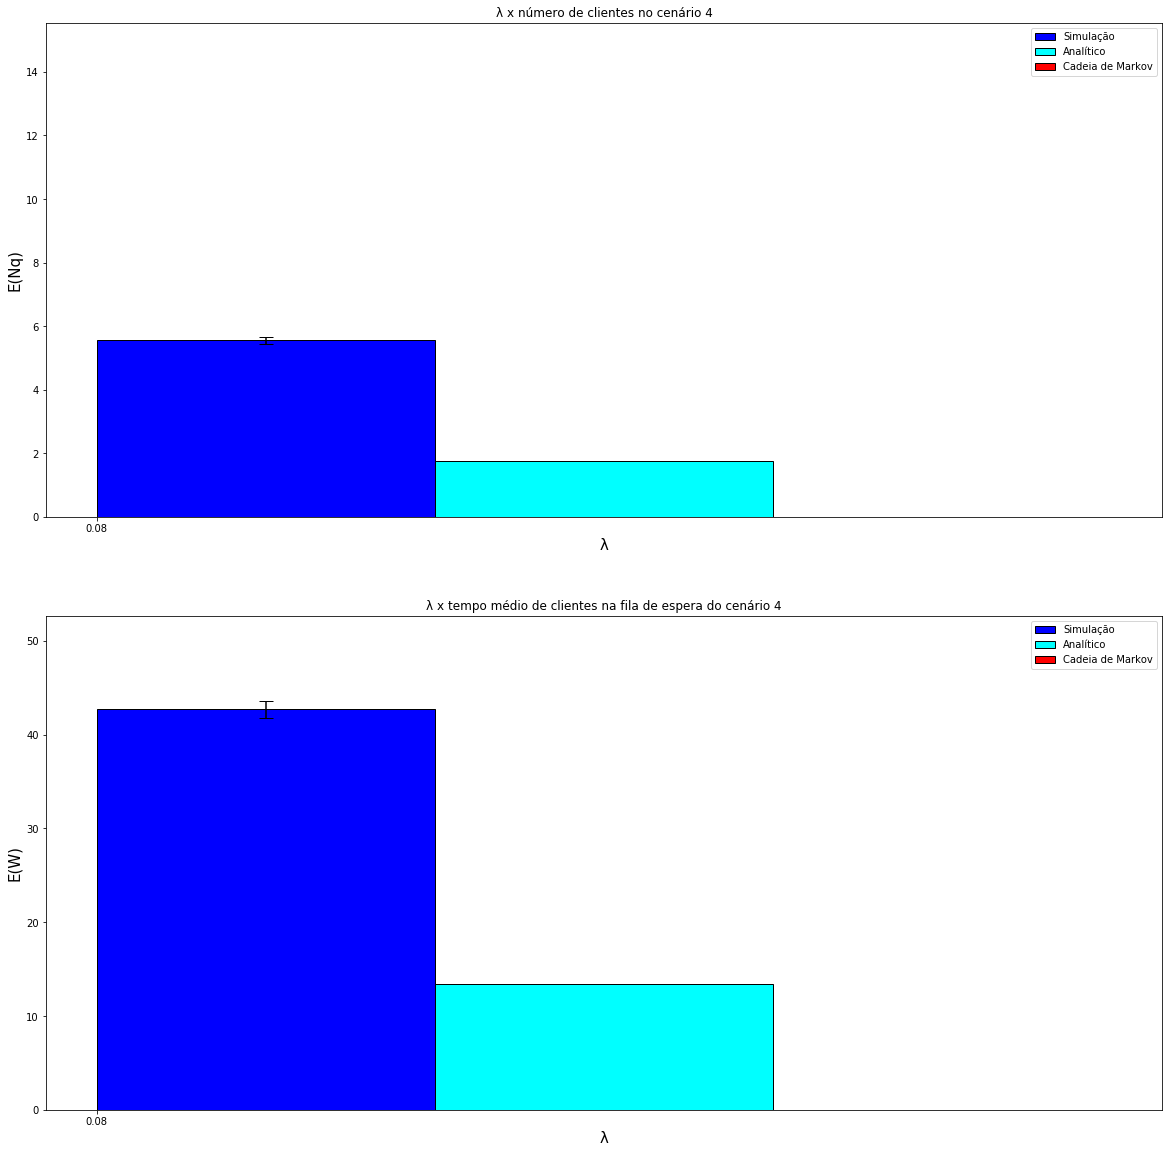

In [0]:
resultCenario4.append(resultCMCenario4[0])
resultCenario4.append(resultCMCenario4[1])

printGraficoQ3(4, resultCenario4, 0)